# Recopilación de datos de Formula 1 de ERGAST Web
Primero vamos a recopilar nuestros datos. Para este laboratorio estamos importando desde ERGAST. Hemos seguido adelante y recopilado los datos por adelantado para ahorrar tiempo durante este laboratorio. Si desea ver cómo se hizo y encontrar código que pueda usar en sus propios proyectos, consulte la carpeta 'from_scratch'.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
start = time.time()

In [3]:
import os
import pandas as pd
import numpy as np
from pprint import pprint
import requests

## Carreras F1

In [4]:
races = pd.read_csv('./data/races.csv')

In [5]:
print(races.shape)

(1018, 8)


In [6]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [7]:
races.tail()

,season,round,circuit_id,lat,long,country,date,url
1013,2019,17,suzuka,34.8431,136.5410,Japan,2019-10-13,https://en.wikipedia.org/wiki/2019_Japanese_Gr...
1014,2019,18,rodriguez,19.4042,-99.0907,Mexico,2019-10-27,https://en.wikipedia.org/wiki/2019_Mexican_Gra...
1015,2019,19,americas,30.1328,-97.6411,USA,2019-11-03,https://en.wikipedia.org/wiki/2019_United_Stat...
1016,2019,20,interlagos,-23.7036,-46.6997,Brazil,2019-11-17,https://en.wikipedia.org/wiki/2019_Brazilian_G...
1017,2019,21,yas_marina,24.4672,54.6031,UAE,2019-12-01,https://en.wikipedia.org/wiki/2019_Abu_Dhabi_G...


## F1 Rondas

In [8]:
rounds = []
for year in np.array(races.season.unique()):
    rounds.append([year, list(races[races.season == year]['round'])])

In [9]:
rounds[:5]

[[1950, [1, 2, 3, 4, 5, 6, 7]],
 [1951, [1, 2, 3, 4, 5, 6, 7, 8]],
 [1952, [1, 2, 3, 4, 5, 6, 7, 8]],
 [1953, [1, 2, 3, 4, 5, 6, 7, 8, 9]],
 [1954, [1, 2, 3, 4, 5, 6, 7, 8, 9]]]

## Resultados de carreras de Fórmula 1


In [10]:
results = pd.read_csv('./data/results.csv')

In [11]:
print(results.shape)

(24167, 13)


In [12]:
results.head()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2,http://en.wikipedia.org/wiki/1950_British_Gran...
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3,http://en.wikipedia.org/wiki/1950_British_Gran...
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4,http://en.wikipedia.org/wiki/1950_British_Gran...
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5,http://en.wikipedia.org/wiki/1950_British_Gran...


In [13]:
results.tail()

,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
24162,2019,21,yas_marina,giovinazzi,1993-12-14,Italian,alfa,16,NaN,+1 Lap,0.0,16,https://en.wikipedia.org/wiki/2019_Abu_Dhabi_G...
24163,2019,21,yas_marina,russell,1998-02-15,British,williams,18,NaN,+1 Lap,0.0,17,https://en.wikipedia.org/wiki/2019_Abu_Dhabi_G...
24164,2019,21,yas_marina,gasly,1996-02-07,French,toro_rosso,11,NaN,+2 Laps,0.0,18,https://en.wikipedia.org/wiki/2019_Abu_Dhabi_G...
24165,2019,21,yas_marina,kubica,1984-12-07,Polish,williams,19,NaN,+2 Laps,0.0,19,https://en.wikipedia.org/wiki/2019_Abu_Dhabi_G...
24166,2019,21,yas_marina,stroll,1998-10-29,Canadian,racing_point,12,NaN,Brakes,0.0,20,https://en.wikipedia.org/wiki/2019_Abu_Dhabi_G...


## Clasificación de pilotos de Fórmula 1

In [14]:
driver_standings = pd.read_csv('./data/driver_standings.csv')

In [15]:
print(driver_standings.shape)

(26264, 9)


In [16]:
driver_standings.head()

,season,round,driver,driver_points_after_race,driver_wins_after_race,driver_standings_pos_after_race,driver_points,driver_wins,driver_standings_pos
0,1950,1,farina,9.0,1,1,0.0,0.0,0.0
1,1950,1,fagioli,6.0,0,2,0.0,0.0,0.0
2,1950,1,reg_parnell,4.0,0,3,0.0,0.0,0.0
3,1950,1,cabantous,3.0,0,4,0.0,0.0,0.0
4,1950,1,rosier,2.0,0,5,0.0,0.0,0.0


In [17]:
driver_standings.tail()

,season,round,driver,driver_points_after_race,driver_wins_after_race,driver_standings_pos_after_race,driver_points,driver_wins,driver_standings_pos
26259,2019,21,kevin_magnussen,20.0,0,16,20.0,0.0,16.0
26260,2019,21,giovinazzi,14.0,0,17,14.0,0.0,17.0
26261,2019,21,grosjean,8.0,0,18,8.0,0.0,18.0
26262,2019,21,kubica,1.0,0,19,1.0,0.0,19.0
26263,2019,21,russell,0.0,0,20,0.0,0.0,20.0


## Clasificación de equipos/constructores de Fórmula 1

In [18]:
constructor_standings = pd.read_csv('./data/constructor_standings.csv')

In [19]:
print(constructor_standings.shape)

(12316, 9)


In [20]:
constructor_standings.head()

,season,round,constructor,constructor_points_after_race,constructor_wins_after_race,constructor_standings_pos_after_race,constructor_points,constructor_wins,constructor_standings_pos
0,1958,1,cooper,8.0,1,1,0.0,0.0,0.0
1,1958,1,ferrari,6.0,0,2,0.0,0.0,0.0
2,1958,1,maserati,3.0,0,3,0.0,0.0,0.0
3,1958,2,cooper,16.0,2,1,8.0,1.0,1.0
4,1958,2,ferrari,12.0,0,2,6.0,0.0,2.0


In [21]:
constructor_standings.tail()

,season,round,constructor,constructor_points_after_race,constructor_wins_after_race,constructor_standings_pos_after_race,constructor_points,constructor_wins,constructor_standings_pos
12311,2019,21,toro_rosso,85.0,0,6,83.0,0.0,6.0
12312,2019,21,racing_point,73.0,0,7,67.0,0.0,7.0
12313,2019,21,alfa,57.0,0,8,57.0,0.0,8.0
12314,2019,21,haas,28.0,0,9,28.0,0.0,9.0
12315,2019,21,williams,1.0,0,10,1.0,0.0,10.0


##  Distribuciones de cada atributo

También podemos observar la distribución de cada atributo discretizando los valores en buckets y revisar la frecuencia en cada bucket como histogramas.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'round'}>,
        <AxesSubplot:title={'center':'constructor_points_after_race'}>],
       [<AxesSubplot:title={'center':'constructor_wins_after_race'}>,
        <AxesSubplot:title={'center':'constructor_standings_pos_after_race'}>,
        <AxesSubplot:title={'center':'constructor_points'}>],
       [<AxesSubplot:title={'center':'constructor_wins'}>,
        <AxesSubplot:title={'center':'constructor_standings_pos'}>,
        <AxesSubplot:>]], dtype=object)

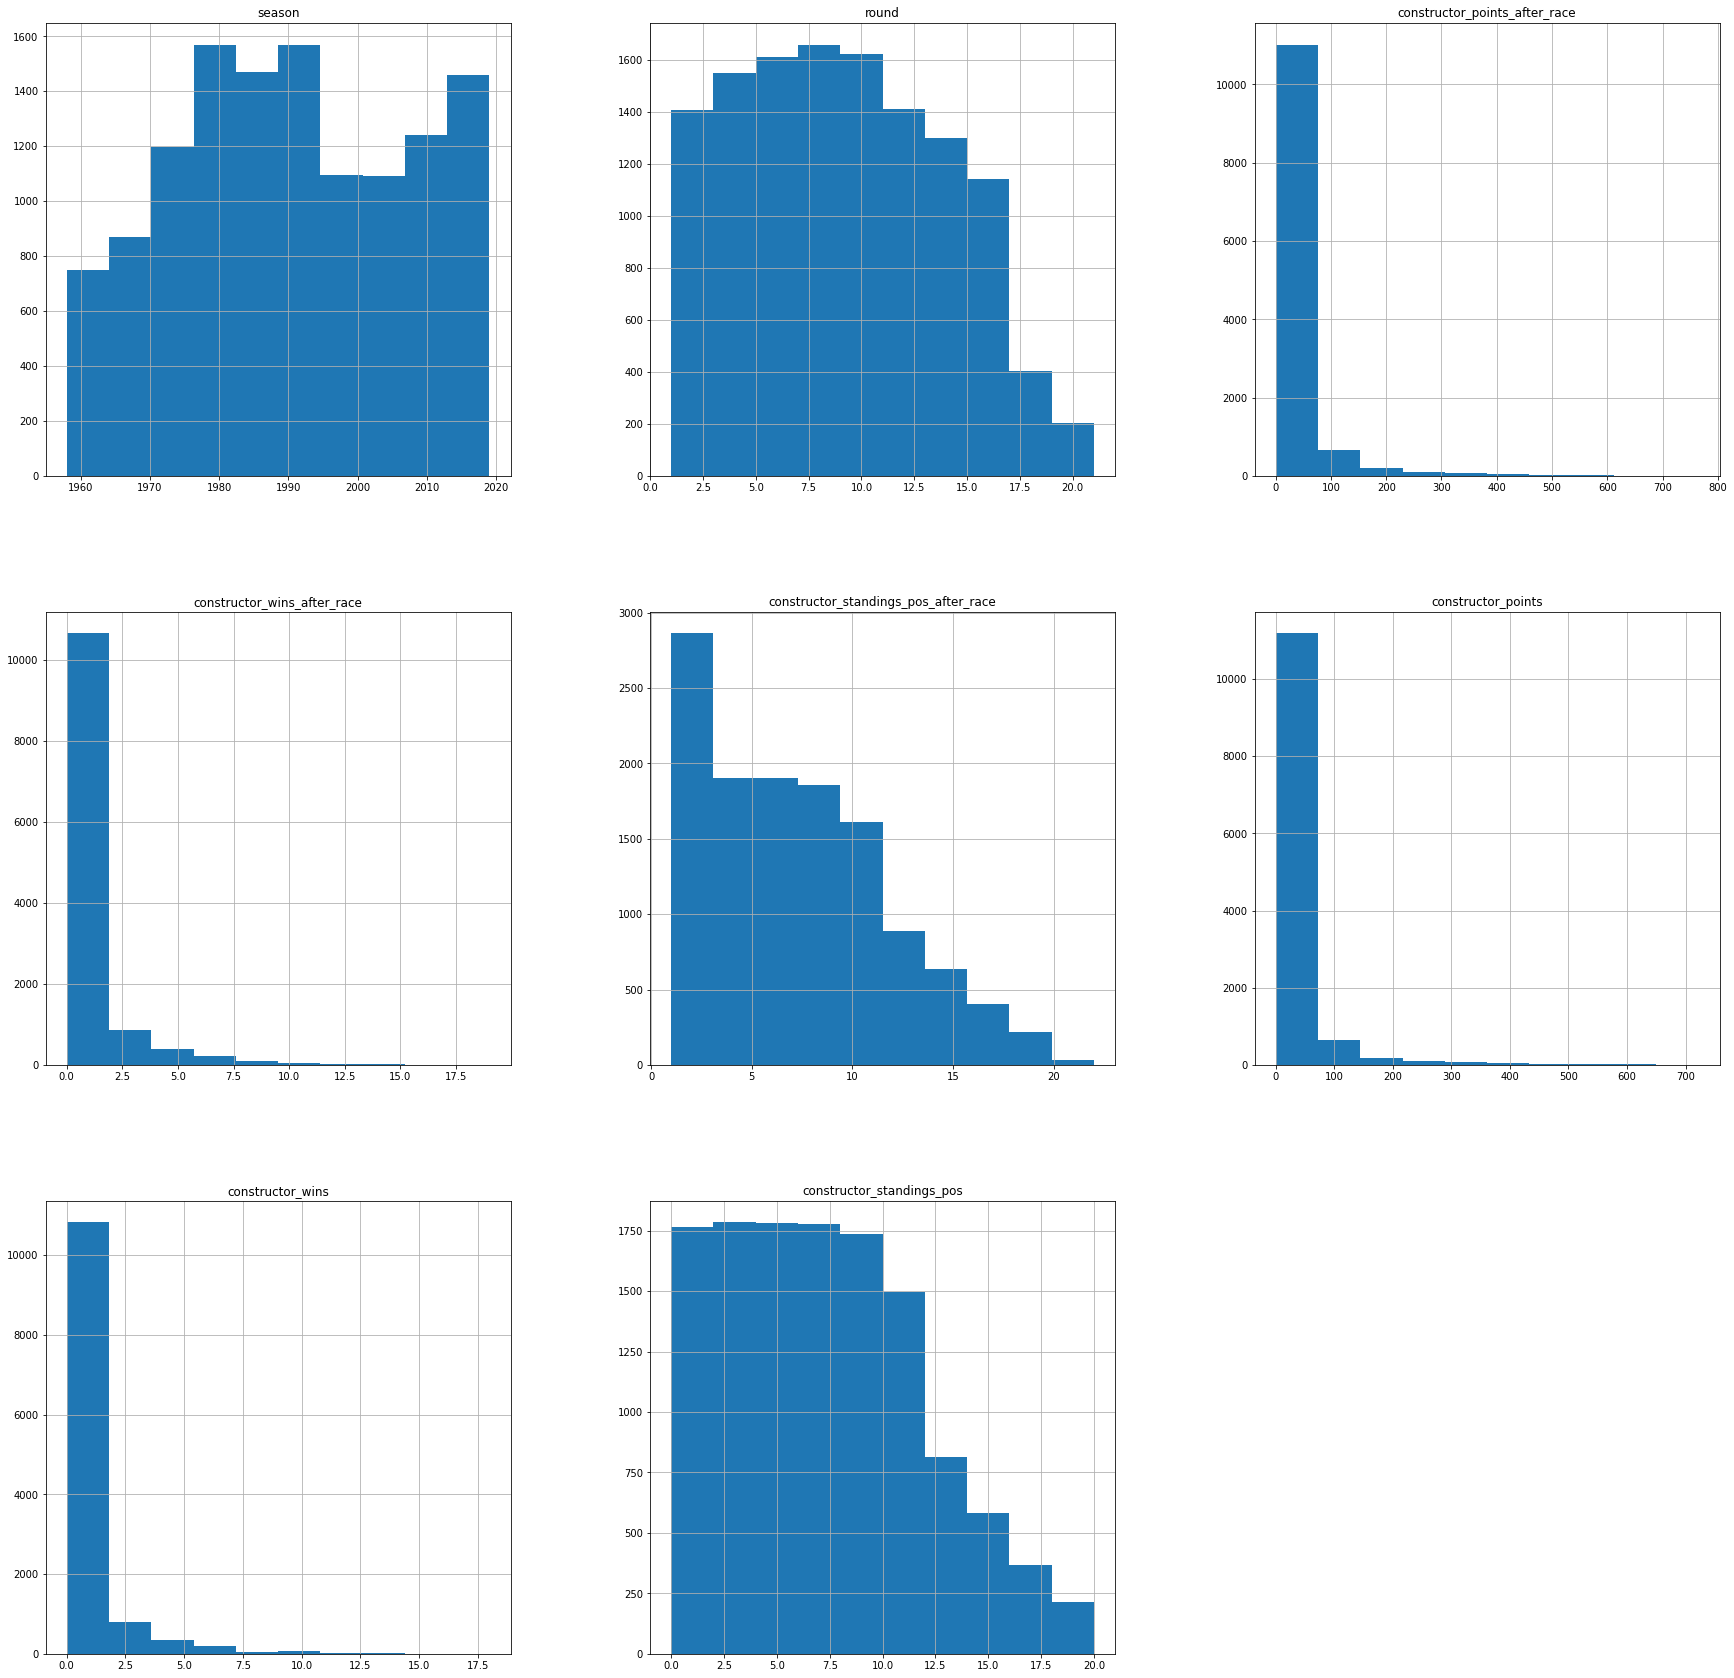

In [22]:
import matplotlib.pyplot as plt
#constructor_standings.boxplot()
fig = plt.figure(figsize=(30,30))
ax = fig.gca()
constructor_standings.hist(ax = ax)

## Relaciones variable-variable

La última relación importante a explorar es la de las relaciones entre los atributos.

Podemos revisar las relaciones entre atributos observando la distribución de las interacciones de cada par de atributos.

array([[<AxesSubplot:xlabel='season', ylabel='season'>,
        <AxesSubplot:xlabel='round', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_points_after_race', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_wins_after_race', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_standings_pos_after_race', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_points', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_wins', ylabel='season'>,
        <AxesSubplot:xlabel='constructor_standings_pos', ylabel='season'>],
       [<AxesSubplot:xlabel='season', ylabel='round'>,
        <AxesSubplot:xlabel='round', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_points_after_race', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_wins_after_race', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_standings_pos_after_race', ylabel='round'>,
        <AxesSubplot:xlabel='constructor_points', ylabel='round'>,
        <AxesSubplot:x

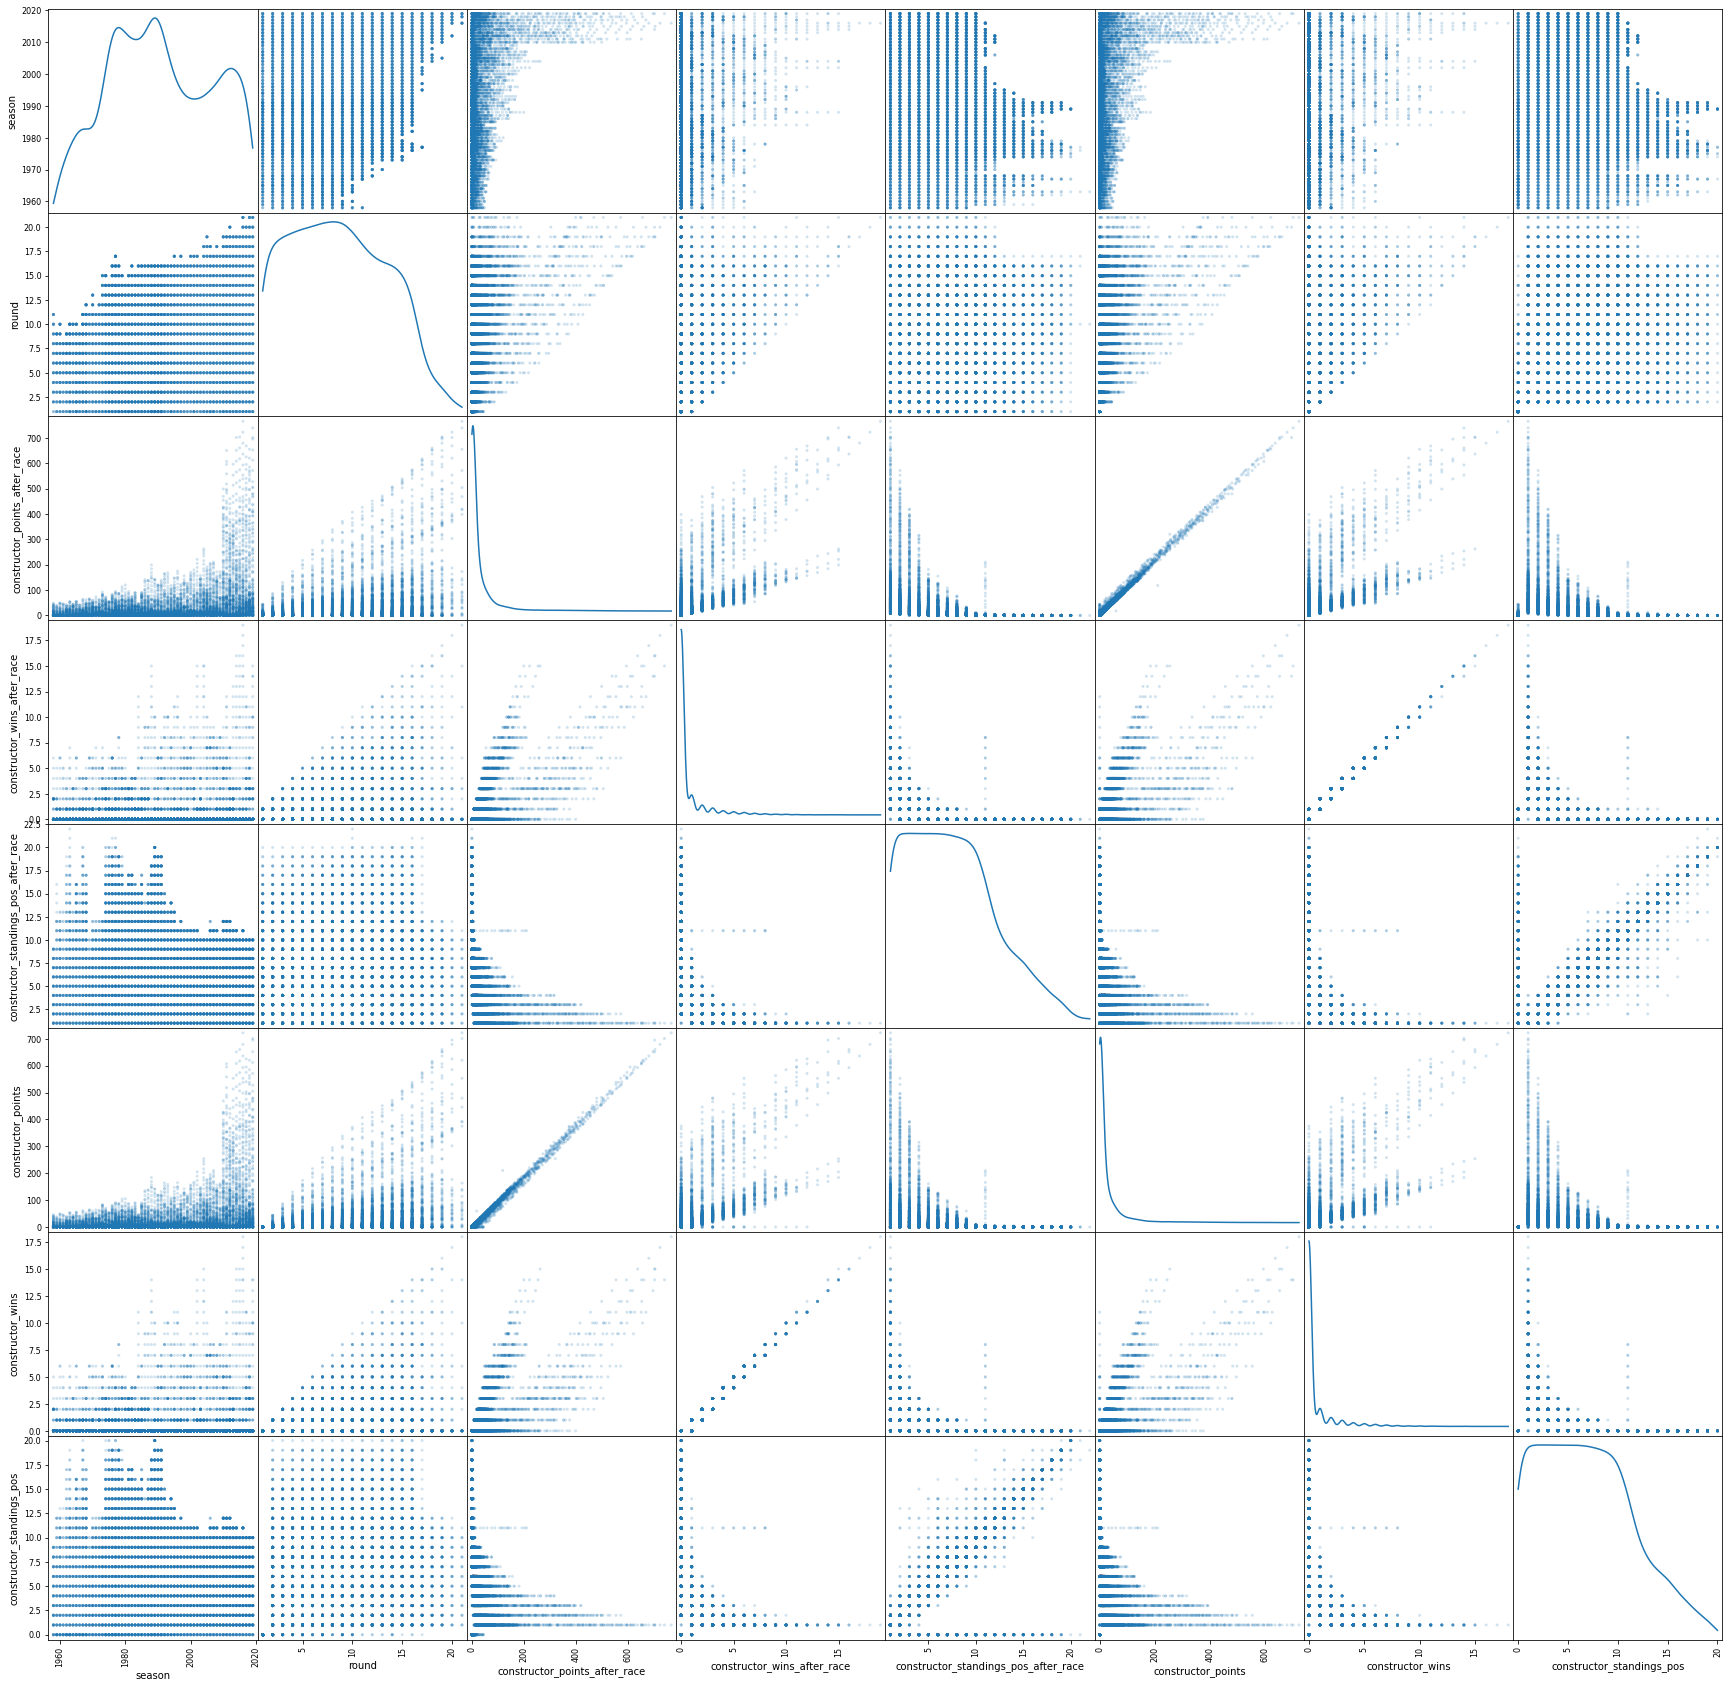

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(constructor_standings, alpha=0.2, figsize=(30, 30), diagonal='kde')

In [24]:
end = time.time()

In [25]:
import datetime
str(datetime.timedelta(seconds=(end - start)))

'0:00:20.978573'

In [26]:
print(str(end - start)+" seconds")

20.978572845458984 seconds
